# _*Exploratory-Data-Analysis-Year-2019*_ 

---
## _*1) Analise das Licitacoes - Ano 2019 - item.csv*_ 

---

---
### _*Carregamento e identificação dos dados*_ 
 _*Na presente etapa os dados são carregados em formato DataFrame.*_ 

 _*Com isso, uma análise inicial de formato e tipo de variáveis é conduzido.*_ 

---

In [1]:
#Importanto as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregabdo o dataset "licitacao.csv" 
df_item = pd.read_csv('item.csv')

#Visualizando as primeiras colunas
df_item.head()

/Users/viniciuspacheci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,76600,18.0,2019,PRP,1,140,140,Tubo de coleta a vácuo com citrato de sódio (3...,100.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
1,76600,18.0,2019,PRP,1,136,136,Sonda tubo endo traqueal descartável com balão...,2.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
2,76600,18.0,2019,PRP,1,130,130,"Lanceta de punção manual 21g 1,8mm x 0,8mm",300.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
3,76600,18.0,2019,PRP,1,129,129,Lamina de bisturi 22,100.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN
4,76600,18.0,2019,PRP,1,128,128,Hastes flexíveis com pontas de algodão (tipo c...,600.0,UN,...,NaN,NaN,NaN,J,21112395000194,NaN,NaN,L,NaN,NaN


In [3]:
#Formato do dataset
print('Dataset shape is: {}' .format(df_item.shape))

Dataset shape is: (884560, 32)


In [4]:
#Visualizando as informacoes e tipos de variaveis existentes
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884560 entries, 0 to 884559
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CD_ORGAO                        884560 non-null  int64  
 1   NR_LICITACAO                    884560 non-null  float64
 2   ANO_LICITACAO                   884560 non-null  int64  
 3   CD_TIPO_MODALIDADE              884560 non-null  object 
 4   NR_LOTE                         884560 non-null  int64  
 5   NR_ITEM                         884560 non-null  int64  
 6   NR_ITEM_ORIGINAL                884560 non-null  object 
 7   DS_ITEM                         884560 non-null  object 
 8   QT_ITENS                        884560 non-null  object 
 9   SG_UNIDADE_MEDIDA               884560 non-null  object 
 10  VL_UNITARIO_ESTIMADO            853300 non-null  float64
 11  VL_TOTAL_ESTIMADO               853300 non-null  float64
 12  DT_REF_VALOR_EST

---
###  _*O objetivo nessa seção é trabalhar com as variáveis objetivo e formação de um dataset de análise. Com isso, fazendo limpezas iniciais no conjunto de dados como remoçao de dados NaN e dados faltantes (NaN).*_

 _*Trabalhando com colunas de interesse ou "target":*_

 a) CD_ORGAO;
 
 b) DS_ITEM;
  
 c) VL_UNITARIO_HOMOLOGADO.
 
---

In [5]:
#Reorganizando o dataset para o alvo da pesquisa
#Criando um novo dataset, buscando manter a originalidade do primeiro
df_analise = df_item[['CD_ORGAO', 'DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']]
df_analise

,CD_ORGAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,76600,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800
1,76600,Sonda tubo endo traqueal descartável com balão...,3.8996
2,76600,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255
3,76600,Lamina de bisturi 22,0.2570
4,76600,Hastes flexíveis com pontas de algodão (tipo c...,0.0160
...,...,...,...
884555,68800,Pneu 195/60R15 88V S/C,230.0000
884556,68800,Pneu 185/70R14 88T S/C,220.0000
884557,68800,Pneu 7.50-16 10 lonas p/ implemento (Grade),398.0000
884558,68800,Pneu 6.00-16 / 6 lonas implemento agrícola,280.0000


In [6]:
#Eliminacao de valor NaN na coluna VL_LICITACAO
df_analise = df_analise[df_analise['VL_UNITARIO_HOMOLOGADO'].notna()]

#Formato do novo dataset sem NaN 
print('Dataset shape is: {}' .format(df_analise.shape))

Dataset shape is: (669349, 3)


In [7]:
#Removendo valores iguais a zero
#Justificativa: Elementos com zero nao influenciam
#no resultado da analise
df_analise = df_analise[(df_analise != 0).all(1)]

#Formato do novo dataset sem zeros
print('Dataset shape is: {}' .format(df_analise.shape))

Dataset shape is: (605185, 3)


In [8]:
#Removendo valores negativos
df_analise = df_analise[(df_analise['VL_UNITARIO_HOMOLOGADO'] > 0)]

#Formato do novo dataset sem zeros
print('Dataset shape is: {}' .format(df_analise.shape))

Dataset shape is: (605169, 3)


---
### _*Trabalhando com cos dados numéricos e agrupamento de itens por órgão.*_ 
 _*Nesta seção, decidiu-se trabalhar e agrupar os dados numéricos para identificação de órgãos com maior incidência no valor unitário homologado (VL_UNITARIO_HOMOLOGADO). A ideia é justamente identificar os principais órgãos, em termos quantitativos.*_ 

 a) Separar os dados numéricos oriundos da coluna "VL_UNITARIO_HOMOLOGADO" 
 
 b) Agrupar os dados com base na coluna "CD_ORGAO". 
 
 c) Identificar o órgao em relação ao item. Tal fator pode diferir da ideia anterior com as licitacoes, pois o item nao necessariamente terá o valor acumulado mais elevado. 
  
---

/Users/viniciuspacheci/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


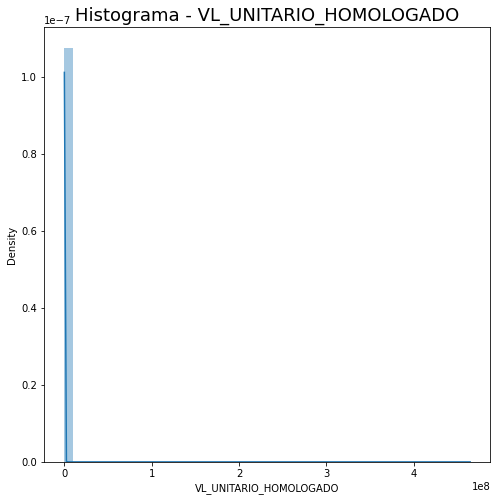

In [9]:
#Avaliando a distribuição da Variável numérica de interesse
plt.figure(figsize = (8, 8))
sns.distplot(df_analise['VL_UNITARIO_HOMOLOGADO'])
plt.title("Histograma - VL_UNITARIO_HOMOLOGADO", size = 18)
plt.savefig('Boxplot-VL_UNITARIO_HOMOLOGADO.png', dpi = 300)

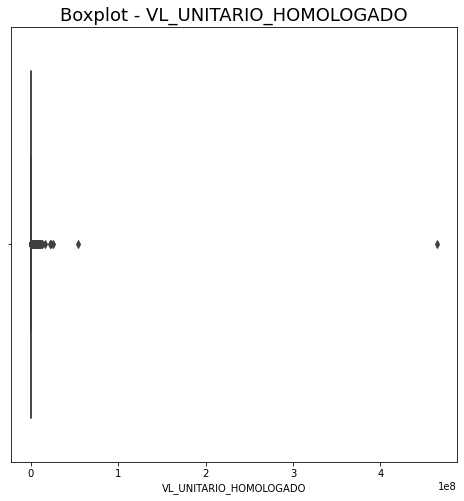

In [10]:
#Observacao da distribuicao estatística
plt.figure(figsize = (8, 8))
sns.boxplot(x = df_analise['VL_UNITARIO_HOMOLOGADO'])
plt.title("Boxplot - VL_UNITARIO_HOMOLOGADO", size = 18)
plt.savefig('Boxplot-VL_UNITARIO_HOMOLOGADO.png', dpi = 300)
#Observa-se de fato uma nao linearidade quanto a termos de valores unitários

In [11]:
#Descricao das principais estatísticas do conjunt
stats = df_analise['VL_UNITARIO_HOMOLOGADO'].describe()
stats

count    6.051690e+05
mean     4.377465e+03
std      6.090671e+05
min      1.000000e-04
25%      3.250000e+00
50%      1.300000e+01
75%      7.884000e+01
max      4.647000e+08
Name: VL_UNITARIO_HOMOLOGADO, dtype: float64

In [12]:
#Agrupando as colunas no formado multiindex, com base na variável target: VL_UNITARIO_HOMOLOGADO
#Criando df para tal finalidade
df_analise_grouped = df_analise.groupby('CD_ORGAO').agg({'VL_UNITARIO_HOMOLOGADO': ['mean',
                                                                         'min', 'max']})
df_analise_grouped

VL_UNITARIO_HOMOLOGADO                      
                           mean       min         max
CD_ORGAO                                             
100                32140.044664      0.07   848745.28
200                11031.116936      0.11  1980000.00
300                 3091.986306      0.03  1808910.00
900                22406.578574      0.15  1747920.67
1000                4427.635000   1775.27     7080.00
...                         ...       ...         ...
88378              16200.000000  16200.00    16200.00
88382               1078.571429     90.00     3800.00
88391              67294.381818    144.00   508999.24
88393               3548.200000   3548.20     3548.20
88394              12892.792000      7.00    71700.00

[765 rows x 3 columns]

In [13]:
#Renomeando as colunas, para nao trabalhar com multiindex

#Renomeando as colunas
df_analise_grouped.columns = ['VL_UNITARIO_HOMOLOGADO-mean', 'VL_UNITARIO_HOMOLOGADO-min', 'VL_UNITARIO_HOMOLOGADO-max']

#Resetando o index
df_analise_grouped = df_analise_grouped.reset_index()
df_analise_grouped

,CD_ORGAO,VL_UNITARIO_HOMOLOGADO-mean,VL_UNITARIO_HOMOLOGADO-min,VL_UNITARIO_HOMOLOGADO-max
0,100,32140.044664,0.07,848745.28
1,200,11031.116936,0.11,1980000.00
2,300,3091.986306,0.03,1808910.00
3,900,22406.578574,0.15,1747920.67
4,1000,4427.635000,1775.27,7080.00
...,...,...,...,...
760,88378,16200.000000,16200.00,16200.00
761,88382,1078.571429,90.00,3800.00
762,88391,67294.381818,144.00,508999.24
763,88393,3548.200000,3548.20,3548.20


In [14]:
#Reordenando o Dataframe em ordem decrescente
df_analise_grouped = df_analise_grouped.sort_values('VL_UNITARIO_HOMOLOGADO-max',
                                                   ascending = False)
df_analise_grouped

,CD_ORGAO,VL_UNITARIO_HOMOLOGADO-mean,VL_UNITARIO_HOMOLOGADO-min,VL_UNITARIO_HOMOLOGADO-max
756,88370,248733.225709,0.010,4.647000e+08
180,50200,116225.675128,0.090,5.345000e+07
252,54900,33724.036653,0.012,2.480000e+07
22,8700,95373.583282,0.010,2.346531e+07
34,40900,45081.081678,0.050,1.643384e+07
...,...,...,...,...
701,88063,39.000000,39.000,3.900000e+01
133,47300,7.403333,0.850,3.300000e+01
562,78202,18.000000,12.000,3.000000e+01
62,42801,4.380000,4.380,4.380000e+00


In [15]:
#Identificando os 5 principais órgaos pela funcao head()
df_analise_grouped_5 = df_analise_grouped.head()
df_analise_grouped_5

,CD_ORGAO,VL_UNITARIO_HOMOLOGADO-mean,VL_UNITARIO_HOMOLOGADO-min,VL_UNITARIO_HOMOLOGADO-max
756,88370,248733.225709,0.010,4.647000e+08
180,50200,116225.675128,0.090,5.345000e+07
252,54900,33724.036653,0.012,2.480000e+07
22,8700,95373.583282,0.010,2.346531e+07
34,40900,45081.081678,0.050,1.643384e+07


In [16]:
#Verificar o órgao relacionado ao código, para isso
#carregamento do dataframe licitacoes
df_licitacao = pd.read_csv('licitacao.csv')

#Execucoes comentadas por motivo de organizacao do código
#df_licitaca[df_licitacao['CD_ORGAO'] == 88370] --> CENTRAL DE LICITAÇÕES DO ESTADOS
#df_licitaca[df_licitacao['CD_ORGAO'] == 50200] --> PM DE ILÓPOLIS
#df_licitaca[df_licitacao['CD_ORGAO'] == 54900] --> PM DE POA
#df_licitaca[df_licitacao['CD_ORGAO'] == 8700] --> CIA. RIO GRANDENSE DE SANEAMENTO
#df_licitaca[df_licitacao['CD_ORGAO'] == 40900] --> PM DE ARATIBA

/Users/viniciuspacheci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


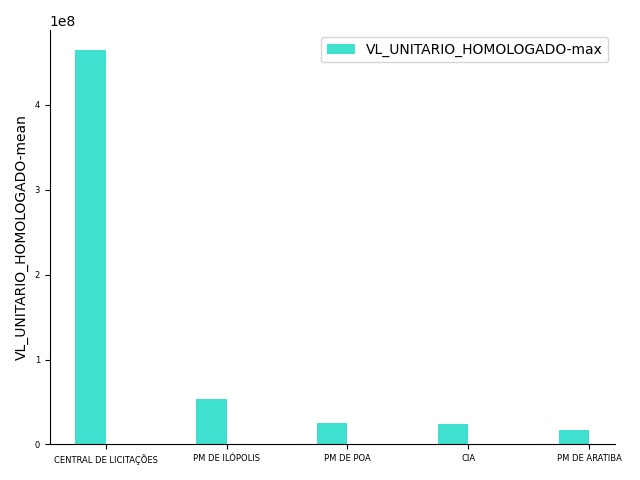

In [17]:
#Criando um Plot de visualizacao com o valor maximo
#Justificativa: objetivo de estudo
%matplotlib notebook
labels = ['CENTRAL DE LICITAÇÕES', 'PM DE ILÓPOLIS', 'PM DE POA', 'CIA', 'PM DE ARATIBA']
x = np.arange(len(labels))  
width = 0.25 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_analise_grouped_5['VL_UNITARIO_HOMOLOGADO-max'], 
                width, label = 'VL_UNITARIO_HOMOLOGADO-max', color = 'turquoise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
ax.set_ylabel('VL_UNITARIO_HOMOLOGADO-mean')
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.show()
plt.savefig('VL_UNITARIO_HOMOLOGADO-max.png', dpi = 300)

<IPython.core.display.Javascript object>


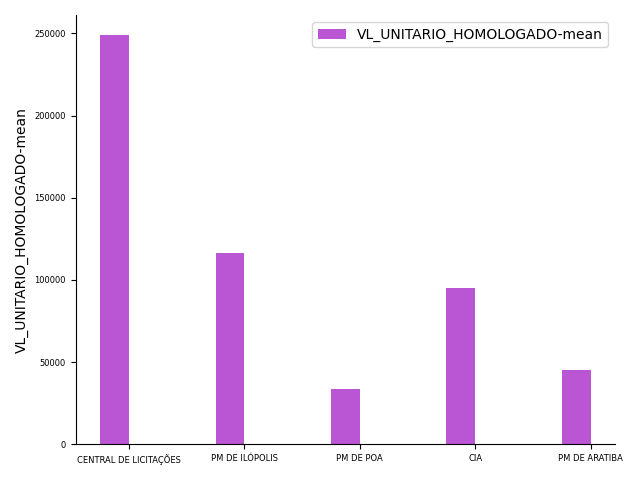

In [18]:
#Criando um Plot de visualizacao com o valor medio
#Justificativa: Visualizacao e interpretacao dos dados
%matplotlib notebook
labels = ['CENTRAL DE LICITAÇÕES', 'PM DE ILÓPOLIS', 'PM DE POA', 'CIA', 'PM DE ARATIBA']
x = np.arange(len(labels))  
width = 0.25 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_analise_grouped_5['VL_UNITARIO_HOMOLOGADO-mean'], 
                width, label = 'VL_UNITARIO_HOMOLOGADO-mean', color = 'mediumorchid')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
ax.set_ylabel('VL_UNITARIO_HOMOLOGADO-mean')
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.show()
plt.savefig('VL_UNITARIO_HOMOLOGADO-mean.png', dpi = 300)

---
###  _*Discussão da análise dos dados numéricos*_ 

A ideia inicial de agrupamento dos dados serviu para identificar os órgãos de maior influência em termos quantitativos, que foram: CENTRAL DE LICITACOES DO ESTADO DO RIO GRANDE DO SUL., PM de Ilópolis, PM de POA, CIA Rio GRandense d Saneamento e PM de Aratiba.  Observa-se que a presente análise, em relação à análise da planilha "licitacoes" podem diferir em termos quantitativos, uma vez que o preço unitário de um objeto, não necessariamente implicaria no órgão com maiores gastos totais.


Com a presente identificação, pode-se ter uma padronização da área de maior exigência por itens isolodamente. Mas não implica diretamente em ser o ítem mais citado, a ser verificado pela análise NLP.


---
###_*Trabalhando com os dados categoricos - DS_ITEM*_

O objetivo dessa seção é avaliar via NLP a ocorrência de palavras com maior frequência na coluna DS_ITEM. Justifica-se essa análise para identificar de fato ítens relevantes na identificação de padrões de ítens licitados.*_

Com isso, o processamento conta com etapas de: Tokenização, Stopwords e criação de n-grams.

Para as etapas, algumas medidas foram necessárias para tratar os dados, como a retirada de acentução, acréscimo de stopwords e procedimento repetido de plotagem e análise dos uni-grams.

---

In [19]:
#Utilizacao do dataframe já selecionado com as colunas: CD_ORGAO, DS_ITEM, VL_UNITARIO_HOMOLOGADO
df_analise

,CD_ORGAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,76600,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800
1,76600,Sonda tubo endo traqueal descartável com balão...,3.8996
2,76600,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255
3,76600,Lamina de bisturi 22,0.2570
4,76600,Hastes flexíveis com pontas de algodão (tipo c...,0.0160
...,...,...,...
884555,68800,Pneu 195/60R15 88V S/C,230.0000
884556,68800,Pneu 185/70R14 88T S/C,220.0000
884557,68800,Pneu 7.50-16 10 lonas p/ implemento (Grade),398.0000
884558,68800,Pneu 6.00-16 / 6 lonas implemento agrícola,280.0000


In [20]:
#Importando pacotes de processamento de linguagem natural NLP
import nltk
nltk.download('punkt') #token
nltk.download('stopwords')
nltk.download('wordnet')

#Importando os pacotes necessarios para particao e analise
#Em caso de separação dos dados, mas optou-se pela integridade, apesar do custo computacional
from sklearn.model_selection import train_test_split

#Processamento de texto e analise, diretamente do nltk
import re
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#Definindo o seed de execucao
seed = 123

#Definindo o Dataset de treino, apenas com a coluna de strings
#Justificativa: Criar um o dataset de interesse apenas com strings
X_train = df_analise['DS_ITEM']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viniciuspacheci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viniciuspacheci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/viniciuspacheci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
#Realizando o "join" ou uniao de todas as strings dispostas na coluna DS_OBJETO
train_string = " ".join(X_train.values)
print(f"**** Extracao da train_string ***** \n{train_string[:101]}", "/n")

**** Extracao da train_string ***** 
Tubo de coleta a vácuo com citrato de sódio (3,2%) - 3,6 ml (tampa azul) Sonda tubo endo traqueal des /n


In [22]:
#Etapa de remoção de acentuação

#Importacao do unicode
import unicodedata

#Criação de função para remoção de acentuação
def remove_acc(palavra):

    #Unicode normalize para transformação de equivalente na em latin
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    #Retorno da palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

In [23]:
#Removendo a acentuação
#remove_acc(train_string)

#Por motivos computacioanis, decidiu-se não usar o atributo na presente análise

In [24]:
#Realizando o split da Colecao do documento, frequentemente chamada de "Corpus"
splits = train_string.split()
print(f"**** Extracao dos splits ***** \n{splits[:18]}\n")

**** Extracao dos splits ***** 
['Tubo', 'de', 'coleta', 'a', 'vácuo', 'com', 'citrato', 'de', 'sódio', '(3,2%)', '-', '3,6', 'ml', '(tampa', 'azul)', 'Sonda', 'tubo', 'endo']



In [25]:
#Verificando o conjunto das strings
#A verificacao das variáel "train_string" em tela gera um esforço computacional
#adicional, logo, opta-se por apenas comentar.
#train_string

In [26]:
#Quantas strings há?
#Retornando os valores obtidos de strinds unificadas e valores unicos do conjunto
print(f"O numero de strings unificadas: {len(splits)}")
print(f"O numero de strings unicas: {len(set(splits))}")

O numero de strings unificadas: 8373836
O numero de strings unicas: 394589


In [27]:
#Encontrando as Strings com maior frequencia no DS_OBJETO
freq_splits = FreqDist(splits)
print(f"***** As 10 strings mais comumns no conjunto de dados DS_OBJETO: ***** /n {freq_splits.most_common(10)}", "/n")

***** As 10 strings mais comumns no conjunto de dados DS_OBJETO: ***** /n [('de', 364295), ('DE', 290438), ('-', 132454), ('com', 127682), ('e', 125924), ('COM', 92102), ('E', 76598), ('em', 73035), ('para', 58164), ('EM', 56428)] /n


In [28]:
#Definindo strings "curtas" (short) com até 2 caracteres
#optou-se por 2 caracteres nesse caso, pois palavras curtas como: pneu
#podem ser alvos do estudo

short = set(i for i in splits if len(i)<2)
short = [(i, freq_splits[i]) for i in short]
short.sort(key = lambda x:x[1], reverse = True)
#short
#Opta-se também, pelo esforço computacional, nao imprimir na tela

#Observa-se especialmente múltiplos unitários como km, e conectivos (tokens)

In [29]:
#Definindo strings "longas" (long) com mais de 18 letras
#Considerar, palavras longas com mais de 20 letras,
#de acordo com norma culta (https://www.normaculta.com.br/palavras-grandes/)
#Critério de análise selecionado para 18 letras.

long = set(i for i in splits if len(i)>18)
long = [(i, freq_splits[i]) for i in long]
long.sort(key = lambda x:x[1], reverse = True)
#long

#Definicao de nao plotagem, pelos mesmos critérios anteriores

In [45]:
#Criando uma funcao (summarise) para identificar o percentual da ocorrencia de certas strings:
#Como por exemplo "pneu"

def summarise(pattern, strings, freq):
    """Funcao summarise encontra o padrao inserido"""
    #Encontrando os "matches"
    compiled_pattern = re.compile(pattern)
    matches = [i for i in strings if compiled_pattern.search(i)]
    
    #Volume e proporcao dos "matches"
    print("{} strings, que sao {: .2%} do total".format(len(matches), len(matches)/len(strings)))
    
    #Criacao de listas de tuplas com os "matches" e as frequencias determinadas
    output = [(i, freq[i]) for i in set(matches)]
    output.sort(key = lambda x:x[1], reverse = True)
    
    return output

In [30]:
#Verificando algumas frequencias --> pneu
#Optou-se por não exibir a função no notebook enviado ao Github,
#por questões de visualização
#summarise(r"pneu", splits, freq_splits)

In [31]:
#Verificando frequencias de números
#Optou-se por não exibir a função no notebook enviado ao Github,
#por questões de visualização

#summarise(r"\d", splits, freq_splits)

#Observa-se a forte presença de números, especialmente na descricao dos atributos
#dos itens comprados

In [32]:
#Verificando a combinacao de palavras com pontuacoes diversas
#Justifica-se essa analise uma vez que nao há padrao na escrita
#Justifica-se também pela grande variabilidade de tipologia de ítens
#Optou-se por não exibir a função no notebook enviado ao Github,
#por questões de visualização

#summarise(r"\w+[_!&/~'-)(<\|}{\[\]]\w+", splits, freq_splits)

---
##  Tokenizacao dos caracteres; 

 Necessária aplicacao de Tokenizacao para eliminar pontuacoes e afins; 

 Essencialmente para identificar quantos tokens existem e quantos tokens unicos existem; 

 Fonte: https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html; 

---

In [33]:
#Aplicando o processo de Tokenizacao (tokenizer)
tokeniser = RegexpTokenizer("[A-Za-z]+")
tokens = tokeniser.tokenize(train_string)
print(tokens[:20], "\n")

['Tubo', 'de', 'coleta', 'a', 'v', 'cuo', 'com', 'citrato', 'de', 's', 'dio', 'ml', 'tampa', 'azul', 'Sonda', 'tubo', 'endo', 'traqueal', 'descart', 'vel'] 



In [34]:
#Com isso, podemos responder as questoes relevantes
print(f"O numero de tokens: {len(tokens)}")
print(f"O numero de tokens unicos: {len(set(tokens))}")

O numero de tokens: 8784492
O numero de tokens unicos: 117705


In [35]:
#Contudo, o numero de tokens é relativamente alto, um processo de normalizacao
#deve ser aplicado para padronizar letras maiúsculas e minúsculas (lower and upper cases)
#Para isso, utiliza-se o processo de lemmatization (agrupamento de formas flexionadas)
lemmatiser = WordNetLemmatizer()
tokens_norm = [lemmatiser.lemmatize(t.lower(), "v") for t in tokens]
print(f"O numero de tokens unicos é de: {len(set(tokens_norm))}")

O numero de tokens unicos é de: 73572


Média de caracteres por token: 4.4827


<IPython.core.display.Javascript object>


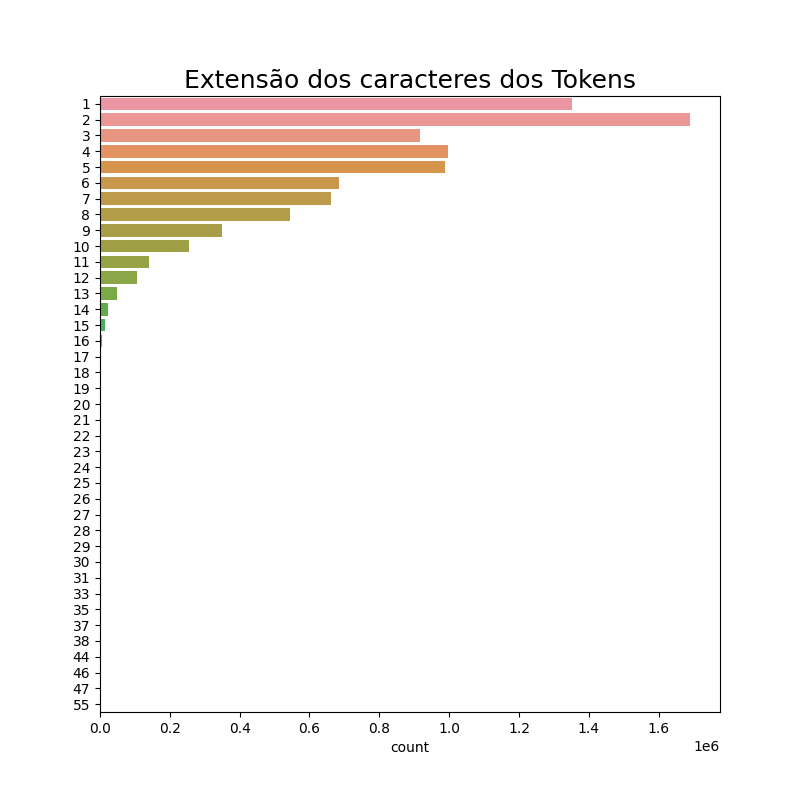

In [36]:
#Com isso, a analise decorre agora da analise dos tokens
#Analisando o "length" dos tokens e sua distribuicao

#Criacao de lista para o "length" de tokens
token_length = [len(t) for t in tokens]

#Numero médio de caracteres por token
print(f"Média de caracteres por token: {round(np.mean(token_length), 4)}")

#Plotando a distribuicao
%matplotlib notebook
plt.figure(figsize = (8, 8))
sns.countplot(y = token_length)
plt.title("Extensão dos caracteres dos Tokens", size = 18)
plt.savefig('Token-Length.png', dpi = 300)

---
##  Stopwords; 

 Identificacao de palavras que nao contribuem para o texto; 

 Por vezes sao conectivos e afins da linguagem; 

---

In [37]:
#Criacao e verificacao das stopwords em Portugues
stop_words = stopwords.words("portuguese")
print(f"Há {len(stop_words)} stopwords.\n")
print(stop_words)

Há 204 stopwords.

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem'

---
##   Processo de adição de stopwords 

  a) O processo foi executado com as stopwords originais; 

  b) Identificação de palavras que nao correspondiam a itens, logo deveriam ser excluidas 

 c) O processo aqui está otimizado, adicionando as palavras requeridas 

---

In [39]:
#Adicionando novas "stopwords" identificadas durante o processo de NLP
new_words = ['mm', 'kg', 'validade', 'exige', 'termo', 'refer', 'ncia',
            'meses', 'contar', 'data', 'entrega', 'dado', 'identifica', 'proced', 'ncia',
            'meses', 'partir', 'data', 'entrega', 'externamente', 'dado', 'identifica', 'proced',
            'nutricional', 'peso', 'fabricante', 'data', 'tulo','ingrediente', 'valor', 'nutricional',
            'cm', 'mg', 'tipo', 'tamanhos', 'unidades', 'qualidade', 'material', 'defeitos', 'ml',
            'possam', 'alterar', 'apar', 'produto', 'ingredientes', 'fabrica', 'nima', 'quantidade',
            'nima', 'destina', 'grau', 'quantidade', 'destina', 'grau', 'dever', 'ser', 'apresentada',
             'amostra', 'conforme', 'material', 'fornecimento', 'instala', 'registro', 'minist', 'rio', 'sa]',
             'nimo', 'ginas', 'cada', 'formato', 'cor', 'vel', 'cada', 'formato', 'livro', 'volume',
            'registro', 'minist', 'rio', 'agricultura', 'descart', 'vel', 'est', 'ril',
            'presta', 'servi', 'cobertura', 'seguro', 'caracter', 'sticas', 'cor', 'branca', 'servi',
            've', 'culo', 'dimes', 'es']
             
#Adicionando as novas palavras as stopwords existentest
stop_words.extend(new_words)
#Replotando as stopwords
#stop_words

In [40]:
#Stopwords mais frequentes utilizadas
n_stopwords = len([t for t in tokens_norm if t in stop_words])
print(f"{n_stopwords} tokens são stopwords")
print(f"Isso corresponde a {round(100*n_stopwords/len(tokens_norm), 2)}%")

3256012 tokens são stopwords
Isso corresponde a 37.07%


---
##   n-gramas ou "n-grams"; 

  Uso de n-grams para identificacao do conjunto de palavras mais relevantes; 

  Objetivando encontra a área de interesse mais frequente requisitada; 

---

In [41]:
#Removendo as stopwords, para análise refinada dos n-grams
tokens_clean = [t for t in tokens_norm if t not in stop_words]
print(f"O número e tokens para análise dos n-grams é de: {len(tokens_clean)}")
print(f"Isso corresponde a redução de {round(100*len(tokens_clean)/len(tokens), 2)}% dos tokens originais")

O número e tokens para análise dos n-grams é de: 5528480
Isso corresponde a redução de 62.93% dos tokens originais


In [ ]:
#Transforming X_train in DataFrame
X_train = pd.DataFrame(X_train)

In [ ]:
#Com a remocao dos tokens, pode-se criar os n-grams: unigrams, bigrams, trigrams e fourgrams
#Com base na definicao das funcoes

def preprocess_text(text):
    """Pré-processamento do texto com tokens normalizados"""
    #Processo de "Tokenise"as palavras em modo alfabérico
    tokenizer = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokenizer.tokenize(text)
    
    #Transformação em "lowercase" e processo de "lemmatise"
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos = 'v') for token in tokens]
    
    #Removendo stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords

def get_frequent_ngram(corpus, ngram, n = 20):
    """Encontrando os n-grams mais comuns com os Tokens normalizados"""
    #Pré-processamento de cada documento
    documents = [preprocess_text(document) for document in corpus]
    
    #Encontrando n-grams por documento
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    #Encontrando a frequência dos n-grams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns = ['ngram', 'count'])

In [ ]:
"""
Os plots dos n-grams não foram executados por motivos computacionais, com intuito de agilizar a execução do códio. Com isso, foram plotados em formato DataFrame.
"""

"""
#Plotando uni-gram 
%matplotlib notebook
mapping = {1:"uni"}
plt.figure(figsize=(5,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 1))
plt.title(f"Mais comum {mapping[1]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[1]}grams.png", dpi = 600"
"""

#Percebe-se que sao características relativas aos itens

In [ ]:
#Replotandon o one-gram, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 1)
data

In [ ]:
"""
#Plotando bi-gram 
%matplotlib notebook
mapping = {2:"bi"}
plt.figure(figsize=(15,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 2))
plt.title(f"Mais comum {mapping[2]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[2]}grams.png", dpi = 600"
"""

In [ ]:
#Replotandon o bi-grams, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 2)
data

In [ ]:
"""
#Plotando tri-gram 
#Replotandon o tri-grams, em formato df
%matplotlib notebook
mapping = {3:"tri"}
plt.figure(figsize=(25,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 3))
plt.title(f"Mais comum {mapping[3]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[3]}grams.png", dpi = 600"
"""

In [ ]:
data = get_frequent_ngram(X_train['DS_ITEM'], 3)
data

In [ ]:
"""
#Plotando four-gram 
%matplotlib notebook
mapping = {4:"four"}
plt.figure(figsize=(33,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 4))
plt.title(f"Mais comum {mapping[4]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[4]}grams.png", dpi = 600"
"""

In [ ]:
#Replotando o four-grams, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 4)
data

In [ ]:
"""
#Plotando five-gram 
%matplotlib notebook
mapping = {5:"five"}
plt.figure(figsize=(33,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 5))
plt.title(f"Mais comum {mapping[5]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[5]}grams.png", dpi = 600"
"""

In [ ]:
#Analisando o five-grams, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 5)
data

---
###  _*Discussão da análise dos dados NLP*_ 

 Através do processamento NLP dos dados textuais, percebeu-se, através do processo dividido em multi-etapas, a identificação de ítens como: farinha de trigo enriquecida com ferro como o principal item. Ainda, outros itens como: embalagem plástica resistente, estrutura de concreto armado e fraldas geriátricas, também foram denominadas como ítens prioritários.


 Com a presente identificação, pode-se ter uma padronização da área de maior exigência por itens isolodamente. Mas não implica diretamente em ser o ítem mais citado, a ser verificado pela análise NLP.


---
##  _*DISCUSSÕES E CONCLUSÕES- Ano 2019 - itens.csv*_


De acordo com a análise exploratória submetida em duas etapas, para análise numérica e NLP, algumas conclusoes podem ser obtidas:

a) Em relação à análise via VL_UNITATIO_HOMOLOGADO, ou seja, análise quantitativa, obeteve-se algumas informações e padrões interessantes quanto  a identificacao dos órgãos expostos no gráfico referente a tal objetivo. Foi possível perceber também que o resultado difere do resultado encontrado na planilha "licitacoes". Lembrando que. como a análise é unitária, o valores em termos de itens pode difererir e é um dado interessante de ser analisado futuramente, em relação aos resultados totais das licitações, encontradas na análise referente.

b) Em relação à análise NLP e os atributos oriundas da doluna DS_ITEM, o processamento necessitou vários procedimentos de refinamento e tokenização, escolha de stopwrods (diversas das já importadas do idioma português, devido à especificidade do problema) e com isso alguns itens listados como: concreto, armaduras para pilares e vigas, obra, ampliação (five-grams)/ e, no uni-gram e bi-grams houve a identificação majoritária de embalagens plásticas; 

c) A análise exploratória foi essencial na identificação de tais padrões e atendeu as expectativas. Análises posteriores são recomendadas em termos de agrupamento de ítens por clusterização e escolha de algorítmos passíveis para tal problemática como: K-Means, DBSCAN, Mean Shift, entre outros. Ainda, sugere-se estudo de "Principal Component Analysis-PCA", tratando das diversas variáveis presentes nos conjuntos de dados, especificamente pela quantia de colunas. Assim como, a sugestão do uso do refino de técnicas de NLP.

d) Ainda, observou-se certas dificuldas em termos de processamento pelo volume de dados, especificamente na presente planilha "item.csv". Especialmente no tratamento de dados no processo de NLP em que a acentuação gráfica foi removida. Logo, para volumes de tais magnitudes, recomenda-se o uso de Cloud Computing.


e) Ainda, para o presente ano de 2019, identificou-se uma acentuação das intenções das licitações em termos de contrução civil.

---